In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import librosa
import os

# Path to your genres folder
genres_folder = "/content/drive/MyDrive/Data/genres_original"
genres = os.listdir(genres_folder)

# Function to safely load audio files
def load_audio_files(genres_folder, genres):
    audio_data = []
    labels = []

    for genre in genres:
        genre_folder = os.path.join(genres_folder, genre)
        for file in os.listdir(genre_folder):
            if file.endswith('.wav'):
                audio_path = os.path.join(genre_folder, file)
                try:
                    # Load audio with original sample rate
                    audio, sr = librosa.load(audio_path, sr=None)
                    audio_data.append(audio)
                    labels.append(genre)
                except Exception as e:
                    print(f"[Skipped] {audio_path} - Error: {e}")

    return audio_data, labels

# Load the dataset
audio_data, labels = load_audio_files(genres_folder, genres)

# Print summary
print(f"\nLoaded {len(audio_data)} audio files.")
print(f"Labels: {set(labels)}")


<ipython-input-18-a89cb07c3733>:20: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


[Skipped] /content/drive/MyDrive/Data/genres_original/jazz/jazz.00054.wav - Error: 

Loaded 999 audio files.
Labels: {'disco', 'blues', 'pop', 'rock', 'classical', 'jazz', 'metal', 'hiphop', 'reggae', 'country'}


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Classes:", le.classes_)


Classes: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [ ]:
import pandas as pd

# Load precomputed features from the CSV file
df = pd.read_csv("/content/drive/MyDrive/Data/features_30_sec.csv")

# Check the structure of the data
print(df.head())

# Ensure the features (all but the 'label' column) are numeric
X = df.drop(columns=['label']).values  # Extract the features
y = df['label'].values  # Extract the labels

# Encode labels to integers (genres)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Reshape the input for LSTM
import numpy as np
X_train_lstm = np.expand_dims(X_train, axis=1)  # Shape: (samples, timesteps=1, features)
X_test_lstm = np.expand_dims(X_test, axis=1)

# Confirm the shape
print("X_train_lstm shape:", X_train_lstm.shape)


          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516        

In [ ]:
import pandas as pd

# Load precomputed features from the CSV file
df = pd.read_csv("/content/drive/MyDrive/Data/features_3_sec.csv")

# Check the structure of the data
print(df.head())

# Ensure the features (all but the 'label' column) are numeric
X = df.drop(columns=['label']).values  # Extract the features
y = df['label'].values  # Extract the labels

# Encode labels to integers (genres)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Reshape the input for LSTM
import numpy as np
X_train_lstm = np.expand_dims(X_train, axis=1)  # Shape: (samples, timesteps=1, features)
X_test_lstm = np.expand_dims(X_test, axis=1)

# Confirm the shape
print("X_train_lstm shape:", X_train_lstm.shape)


            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.05

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Load features from the 30-second dataset
df_30_sec = pd.read_csv("/content/drive/MyDrive/Data/features_30_sec.csv")

# Extract features (X) and labels (y)
X_30_sec = df_30_sec.drop(columns=['filename', 'label']).values  # Drop 'filename' and 'label' columns
y_30_sec = df_30_sec['label'].values

# Encode labels into integers
le = LabelEncoder()
y_30_sec_encoded = le.fit_transform(y_30_sec)

# Split data into training and test sets
X_train_30_sec, X_test_30_sec, y_train_30_sec, y_test_30_sec = train_test_split(
    X_30_sec, y_30_sec_encoded, test_size=0.2, random_state=42, stratify=y_30_sec_encoded)

# Reshape data for LSTM (samples, timesteps=1, features)
X_train_lstm_30_sec = np.expand_dims(X_train_30_sec, axis=1)
X_test_lstm_30_sec = np.expand_dims(X_test_30_sec, axis=1)

# Define LSTM model
model_30_sec = Sequential([
    LSTM(64, input_shape=(X_train_lstm_30_sec.shape[1], X_train_lstm_30_sec.shape[2]), return_sequences=False),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')  # Number of output classes
])

# Compile the model
model_30_sec.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_30_sec.fit(X_train_lstm_30_sec, y_train_30_sec, epochs=10, batch_size=64, validation_data=(X_test_lstm_30_sec, y_test_30_sec))

# Evaluate the model
test_loss, test_accuracy = model_30_sec.evaluate(X_test_lstm_30_sec, y_test_30_sec)
print(f"Test accuracy for 30-sec features: {test_accuracy}")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.0977 - loss: 2.3768 - val_accuracy: 0.1450 - val_loss: 2.2923
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1421 - loss: 2.2728 - val_accuracy: 0.1650 - val_loss: 2.2168
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2190 - loss: 2.1819 - val_accuracy: 0.2200 - val_loss: 2.1624
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2259 - loss: 2.1218 - val_accuracy: 0.2250 - val_loss: 2.1175
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2364 - loss: 2.0774 - val_accuracy: 0.2250 - val_loss: 2.0847
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2487 - loss: 2.0337 - val_accuracy: 0.2400 - val_loss: 2.0602
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2455 - loss: 2.0068 - val_accuracy: 0.2500 - val_loss: 2.0384
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2982 - loss: 1.9603 - val_accuracy: 0.2600 - val_loss: 2.

In [ ]:
# Load features from the 3-second dataset
df_3_sec = pd.read_csv("/content/drive/MyDrive/Data/features_3_sec.csv")

# Extract features (X) and labels (y)
X_3_sec = df_3_sec.drop(columns=['filename', 'label']).values  # Drop 'filename' and 'label' columns
y_3_sec = df_3_sec['label'].values

# Encode labels into integers
y_3_sec_encoded = le.fit_transform(y_3_sec)

# Split data into training and test sets
X_train_3_sec, X_test_3_sec, y_train_3_sec, y_test_3_sec = train_test_split(
    X_3_sec, y_3_sec_encoded, test_size=0.2, random_state=42, stratify=y_3_sec_encoded)

# Reshape data for LSTM (samples, timesteps=1, features)
X_train_lstm_3_sec = np.expand_dims(X_train_3_sec, axis=1)
X_test_lstm_3_sec = np.expand_dims(X_test_3_sec, axis=1)

# Define LSTM model
model_3_sec = Sequential([
    LSTM(64, input_shape=(X_train_lstm_3_sec.shape[1], X_train_lstm_3_sec.shape[2]), return_sequences=False),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')  # Number of output classes
])

# Compile the model
model_3_sec.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_3_sec.fit(X_train_lstm_3_sec, y_train_3_sec, epochs=10, batch_size=64, validation_data=(X_test_lstm_3_sec, y_test_3_sec))

# Evaluate the model
test_loss, test_accuracy = model_3_sec.evaluate(X_test_lstm_3_sec, y_test_3_sec)
print(f"Test accuracy for 3-sec features: {test_accuracy}")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1388 - loss: 2.2684 - val_accuracy: 0.2142 - val_loss: 2.1247
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2354 - loss: 2.0883 - val_accuracy: 0.2558 - val_loss: 2.0610
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2380 - loss: 2.0489 - val_accuracy: 0.2242 - val_loss: 2.0769
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2582 - loss: 2.0176 - val_accuracy: 0.2658 - val_loss: 2.0371
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2443 - loss: 2.0254 - val_accuracy: 0.2387 - val_loss: 2.0342
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2391 - loss: 2.0488 - val_accuracy: 0.2452 - val_loss: 2.0539
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2545 - loss: 2.0191 - val_accuracy: 0.2172 - val_loss: 2.0587
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2364 - loss: 2.0284 - val_accuracy: 0.2217 - val

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


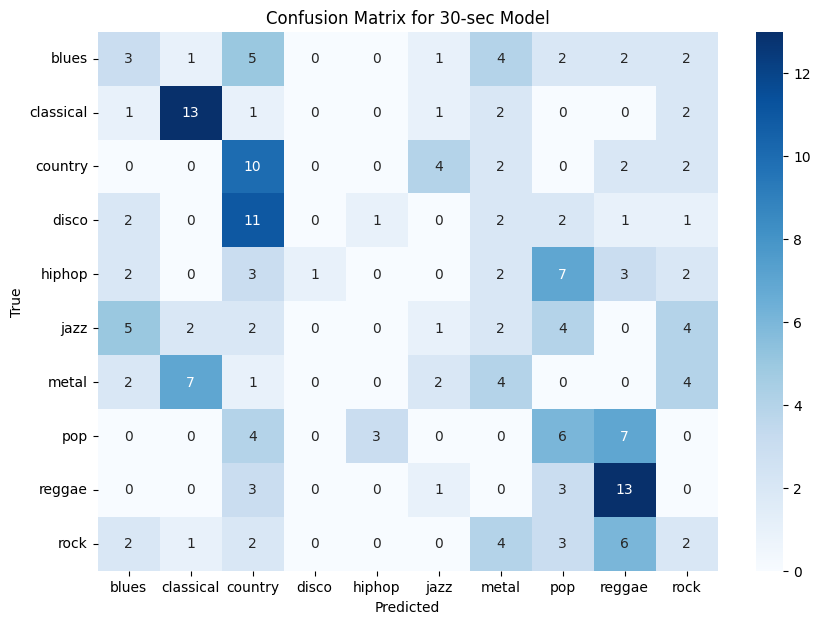

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


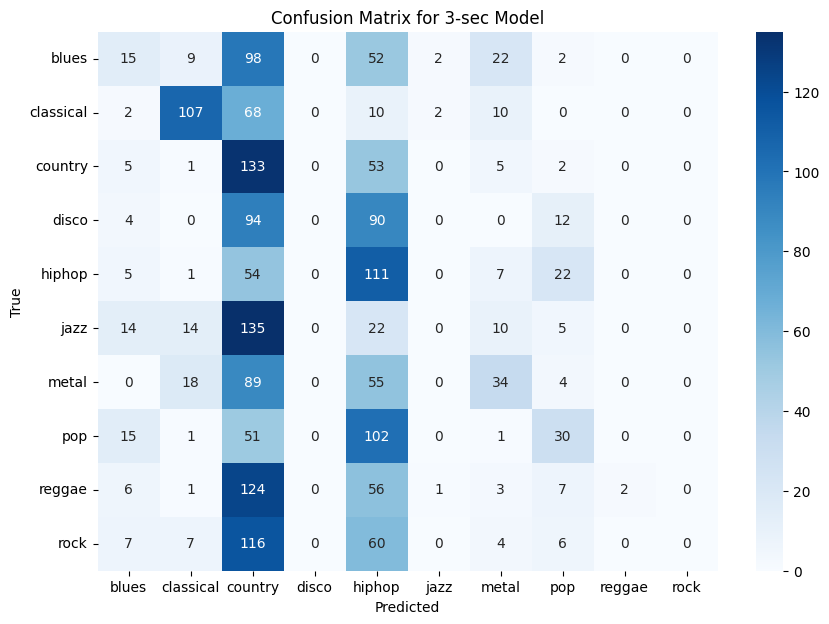

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# For 30-second features model
y_pred_30_sec = model_30_sec.predict(X_test_lstm_30_sec)
y_pred_30_sec = np.argmax(y_pred_30_sec, axis=1)

cm_30_sec = confusion_matrix(y_test_30_sec, y_pred_30_sec)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_30_sec, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix for 30-sec Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# For 3-second features model
y_pred_3_sec = model_3_sec.predict(X_test_lstm_3_sec)
y_pred_3_sec = np.argmax(y_pred_3_sec, axis=1)

cm_3_sec = confusion_matrix(y_test_3_sec, y_pred_3_sec)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_3_sec, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix for 3-sec Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
le = LabelEncoder()
le.fit(['class_0', 'class_1'])  # Replace with actual class names if they are strings

# Or if you use numeric labels:
le.fit([0, 1])


LabelEncoder()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


<ipython-input-39-b479b71051be>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", n_classes)


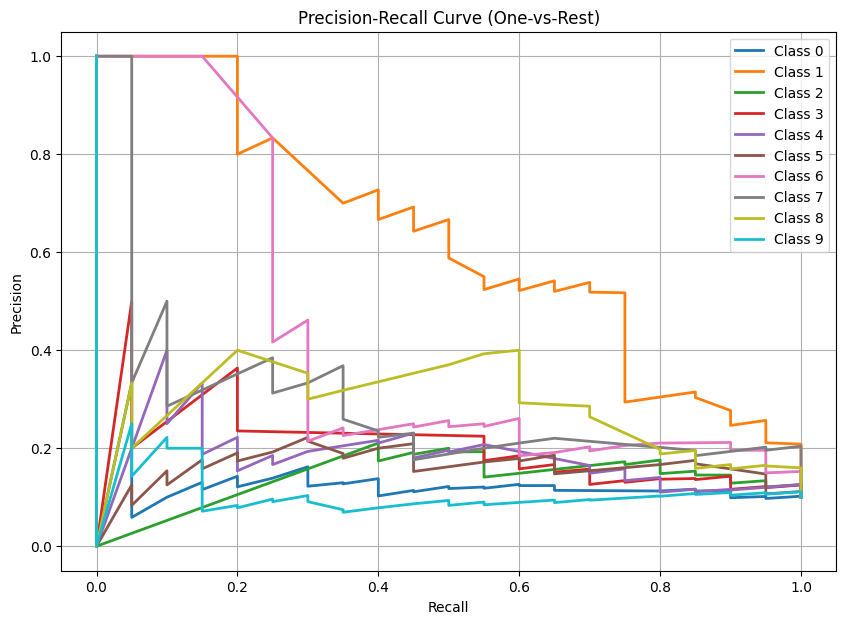

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Binarize the output (for multi-class PR curve)
n_classes = len(np.unique(y_test_30_sec))
y_test_binarized = label_binarize(y_test_30_sec, classes=range(n_classes))

# Predict probabilities for each class (shape: [n_samples, n_classes])
y_score = model_30_sec.predict(X_test_lstm_30_sec)

# Plot PR curve for each class
plt.figure(figsize=(10, 7))
colors = plt.cm.get_cmap("tab10", n_classes)

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {i}', color=colors(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (One-vs-Rest)")
plt.legend()
plt.grid(True)
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


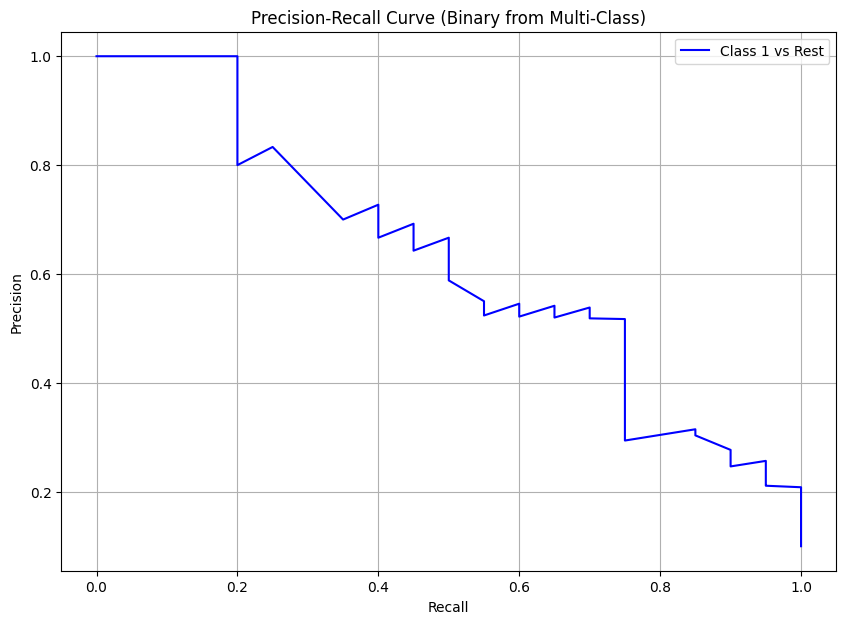

In [ ]:
# Create binary labels: is the class == 1?
y_test_binary = (y_test_30_sec == 1).astype(int)

# Get probability for class 1
y_pred_prob = model_30_sec.predict(X_test_lstm_30_sec)[:, 1]

# Now compute PR curve
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_pred_prob)

# Plot
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='b', label='Class 1 vs Rest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Binary from Multi-Class)')
plt.legend()
plt.grid(True)
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


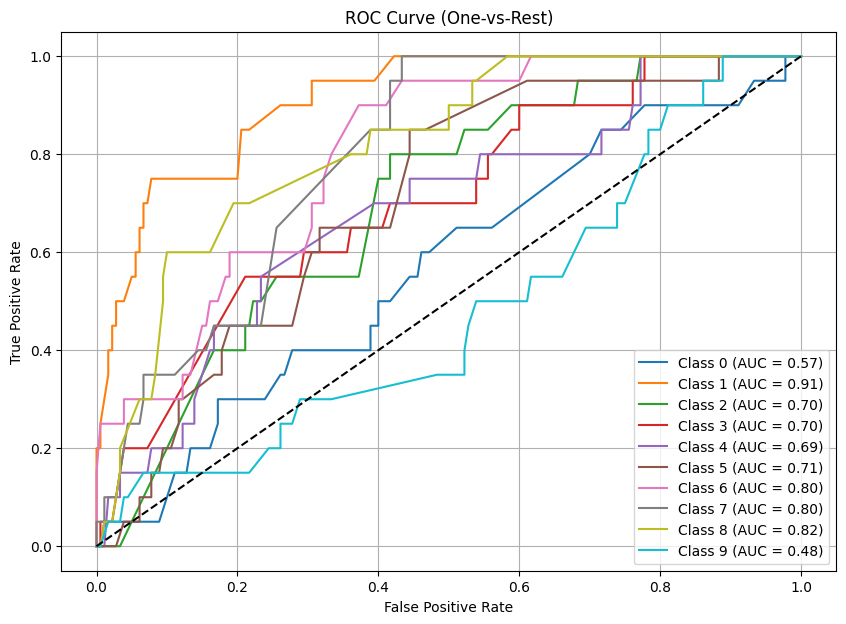

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class
n_classes = len(np.unique(y_test_30_sec))
y_test_bin = label_binarize(y_test_30_sec, classes=range(n_classes))
y_score = model_30_sec.predict(X_test_lstm_30_sec)

# Plot ROC for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from statsmodels.stats.weightstats import ztest

# Suppose accuracy from two models
acc_model1 = [0.83, 0.84, 0.85]
acc_model2 = [0.78, 0.80, 0.79]

z_stat, p_val = ztest(acc_model1, acc_model2)
print(f"Z-statistic: {z_stat:.2f}, p-value: {p_val:.4f}")


Z-statistic: 6.12, p-value: 0.0000


In [ ]:
from scipy.stats import f_oneway

# Choose the MFCC feature to test
feature = 'mfcc1_mean'

# Filter for three genres
genre1 = df[df['label'] == 'blues'][feature]
genre2 = df[df['label'] == 'metal'][feature]
genre3 = df[df['label'] == 'jazz'][feature]

# Run ANOVA
f_stat, p_val = f_oneway(genre1, genre2, genre3)
print(f"ANOVA for {feature}: F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")


ANOVA for mfcc1_mean: F-statistic = 995.60, p-value = 0.0000


In [ ]:
features = [f'mfcc{i}_mean' for i in range(1, 21)]

for feature in features:
    genre1 = df[df['label'] == 'blues'][feature]
    genre2 = df[df['label'] == 'metal'][feature]
    genre3 = df[df['label'] == 'jazz'][feature]

    f_stat, p_val = f_oneway(genre1, genre2, genre3)
    print(f"{feature}: F = {f_stat:.2f}, p = {p_val:.4f}")


mfcc1_mean: F = 995.60, p = 0.0000
mfcc2_mean: F = 390.85, p = 0.0000
mfcc3_mean: F = 495.70, p = 0.0000
mfcc4_mean: F = 584.59, p = 0.0000
mfcc5_mean: F = 188.35, p = 0.0000
mfcc6_mean: F = 766.44, p = 0.0000
mfcc7_mean: F = 234.56, p = 0.0000
mfcc8_mean: F = 1106.20, p = 0.0000
mfcc9_mean: F = 133.63, p = 0.0000
mfcc10_mean: F = 834.83, p = 0.0000
mfcc11_mean: F = 256.93, p = 0.0000
mfcc12_mean: F = 841.55, p = 0.0000
mfcc13_mean: F = 527.76, p = 0.0000
mfcc14_mean: F = 234.19, p = 0.0000
mfcc15_mean: F = 328.92, p = 0.0000
mfcc16_mean: F = 219.35, p = 0.0000
mfcc17_mean: F = 509.41, p = 0.0000
mfcc18_mean: F = 223.24, p = 0.0000
mfcc19_mean: F = 131.47, p = 0.0000
mfcc20_mean: F = 155.97, p = 0.0000
